In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import time
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input

def custom_mre(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    relative_error = np.abs((y_true - y_pred) / y_true)
    mre = np.mean(relative_error) * 100.0
    return mre

In [2]:
# Cargar el archivo CSV con punto y coma como delimitador
data = pd.read_csv('Cluster0ReadyToNN.csv', delimiter=';')

# Crear un diccionario para almacenar los objetos scaler por grupo
scalers = {}

# Iterar sobre los grupos únicos en Column15
for group in data['Column15'].unique():
    # Filtrar datos por grupo
    group_data = data[data['Column15'] == group]

    # Seleccionar las columnas para normalización (las 13 primeras)
    features = group_data.iloc[:, :13]

    # Normalizar los datos con MinMaxScaler
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(features)

    # Almacenar el scaler en el diccionario
    scalers[group] = scaler

    # Actualizar el DataFrame con los datos normalizados
    data.loc[data['Column15'] == group, 'Column1':'Column13'] = normalized_data

# Guardar el DataFrame modificado en un nuevo archivo CSV con punto y coma como delimitador
#data.to_csv('DataNormalized.csv', index=False, sep=';')


In [4]:
# Ordenar el DataFrame por 'Column 14' de forma ascendente
data = data.sort_values(by='Column14')

# Dividir los datos en entrenamiento (70%) y temporal (30%)
#train_temp_data, test_data = train_test_split(data, test_size=0.3, stratify=data['Column15'], random_state=0)
train_temp_data, test_data = train_test_split(data, test_size=0.3, shuffle=False, random_state=0)

# Dividir el temporal en entrenamiento (70%) y validación (30%)
#train_data, validation_data = train_test_split(train_temp_data, test_size=0.3, stratify=train_temp_data['Column15'], random_state=0)
train_data, validation_data = train_test_split(train_temp_data, test_size=0.3, shuffle=False, random_state=0)

# Separar características (X) y columna objetivo (y)
X_train_norm = train_data.iloc[:, :12]
y_train_norm = train_data['Column13']
X_val_norm = validation_data.iloc[:, :12]
y_val_norm = validation_data['Column13']
X_test_norm = test_data.iloc[:, :12]
y_test_norm = test_data['Column13']

In [4]:
data

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15
0,0.317757,0.163551,1.000000,0.957447,1.000000,0.750000,0.979167,0.708333,0.979167,1.000000,0.641026,0.897436,1.000000,2002/3,23
30078,0.164179,0.194030,0.138686,0.138686,0.109489,0.167883,0.160584,0.160584,0.160584,0.182482,0.153285,0.145985,0.167883,2002/3,10755
139428,0.042553,0.652482,0.836879,1.000000,0.295775,0.816901,0.295775,0.281690,0.492958,0.985915,0.436620,0.281690,0.535211,2002/3,49541
30024,0.203822,0.286624,0.159236,0.197452,0.178344,0.197452,0.140127,0.159236,0.210191,0.267516,0.248408,0.394904,1.000000,2002/3,10617
139482,0.000000,0.032000,0.016000,0.024000,0.032000,0.104000,0.352000,0.120000,0.048000,1.000000,0.825688,0.609091,0.054545,2002/3,49567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102221,0.047619,0.081633,0.156463,0.183673,0.115646,0.081633,0.299320,0.115646,0.095238,0.129252,0.129252,0.653061,0.319728,2015/4,35402
65879,0.119403,0.031716,0.041045,0.145522,0.078358,0.022388,0.024254,0.095149,0.067164,0.011194,0.035448,0.177239,0.082090,2015/4,22419
135863,0.091139,0.126582,0.162025,0.048101,0.106329,0.189873,0.164557,0.111392,0.098734,0.116456,0.147959,0.107143,0.087629,2015/4,47934
135755,0.028777,0.028777,0.050360,0.035971,0.035971,0.035971,0.043165,0.029197,0.000000,0.007299,0.021898,0.051095,0.007299,2015/4,47798


In [4]:
test_data.head(20)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15
24905,0.222222,0.277778,0.265306,0.224490,0.367347,0.251701,1.000000,0.312925,0.292517,0.170068,0.209459,0.216216,0.128378,2005/2,8751
155320,0.228972,0.084112,0.049065,0.058411,0.144860,0.067757,0.058411,0.260870,0.335404,0.198758,0.149068,0.186335,0.347826,2006/3,56704
8745,0.114943,0.114943,0.103448,0.126437,0.126437,0.159420,0.150000,0.150000,0.083333,0.116667,0.103448,0.155172,0.051724,2015/2,3059
60462,0.307241,0.054264,0.032946,0.108527,0.300388,0.054264,0.031008,0.040698,0.253876,0.036320,0.019370,0.053269,0.295400,2011/3,20496
4241,0.162963,0.118519,0.177778,0.133333,0.118519,0.140741,0.140741,0.074074,0.103704,0.111111,0.918519,0.096296,0.155556,2009/4,1242
58407,0.142132,0.157360,0.182741,0.096447,0.131980,0.147208,0.131980,0.131980,0.126904,0.147208,0.126904,0.096939,0.091837,2010/4,19892
124215,0.038462,0.102564,0.166667,0.128205,0.128205,0.192308,0.179487,0.076923,0.051282,0.064103,0.128205,0.025641,0.012821,2006/2,43198
143532,0.000000,0.046154,0.015385,0.092308,0.061538,0.076923,0.000000,0.031250,0.062500,0.000000,0.000000,0.046875,0.062500,2002/3,51327
34430,0.080103,0.069767,0.056848,0.056848,0.095607,0.082687,0.058974,0.053846,0.105128,0.133333,0.074359,0.056410,0.061538,2010/3,12261
75228,0.209877,0.152263,0.259259,0.152091,0.190114,0.129278,0.045627,0.007605,0.019011,0.030418,0.326996,0.075269,0.046595,2004/1,25336


In [5]:
numFreezeLayers = 12 #12 para 12 training layers y 6 para 18 training layers

# Cargar el modelo preentrenado
model = load_model('modelTrainedv2.h5', custom_objects={'custom_mre': custom_mre})

# Crear una nueva capa de entrada con 12 neuronas
nueva_capa_entrada = Input(shape=(12,))

# Construir un nuevo modelo que incluya la nueva capa de entrada
new_model = Sequential()
new_model.add(nueva_capa_entrada)

# Redimensionar la capa dense_1 para que sea compatible con 12 neuronas de entrada
# La capa dense_1 tenía inicialmente 30 unidades, se ajusta la matriz de pesos a (12, 30)
new_model.add(Dense(30, activation='tanh', input_shape=(12,), name="dense_update"))

# Agregar las capas restantes del modelo preentrenado (excluyendo la capa de entrada original)
for layer in model.layers[1:]:
    new_model.add(layer)

# Congelar las capas anteriores
for capa in new_model.layers[0:numFreezeLayers+1]:
    capa.trainable = False
    
"""
# Cambiar la función de activación de las últimas 10 capas a ReLU
for capa in new_model.layers[0:25]:
    if hasattr(capa, 'activation'):
        capa.activation = keras.activations.relu
"""

# Agregar una nueva capa de salida con 1 neurona
new_model.add(Dense(1, activation='tanh'))

# Obtener las funciones de activación asignadas
activations = [layer.activation.__name__ for layer in new_model.layers]
print(activations)

# Obtener funciones de activación y entrenabilidad asignadas
layer_info = [layer.trainable for layer in new_model.layers]
print(layer_info)

# Definir el optimizador
optimizer = keras.optimizers.Adam(epsilon=1E-8, learning_rate=0.0005)

# Compilar el nuevo modelo y entrenarlo con tus datos
new_model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_squared_error'])
new_model.summary()


early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear (en este caso, la pérdida en el conjunto de validación)
    patience=20,  # Número de épocas sin mejora antes de detener el entrenamiento
    min_delta=1E-4,  # Valor mínimo de mejora para considerar como una mejora significativa
    restore_best_weights=True  # Restaurar los mejores pesos del modelo cuando se detiene
)

['tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh']
[False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_update (Dense)        (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 80)                2480      
                                                                 
 dense_2 (Dense)             (None, 90)                7290      
                                                                 
 dense_3 (Dense)             (None, 60)                5460      
       

In [6]:
# Entrenar el modelo con Early Stopping
epochs = 300  
batch_size = 256 
# Comienza a medir el tiempo de entrenamiento
start_time = time.time()
#Entrenamiento del modelo
history = new_model.fit(X_train_norm, y_train_norm, epochs=epochs, batch_size=batch_size, validation_data=(X_val_norm, y_val_norm), callbacks=[early_stopping])
# Finaliza la medición del tiempo de entrenamiento
end_time = time.time()


Epoch 1/300
327/327 [==============================] - 3s 5ms/step - loss: 0.1329 - mean_squared_error: 0.0467 - val_loss: 0.0913 - val_mean_squared_error: 0.0266
Epoch 2/300
327/327 [==============================] - 2s 5ms/step - loss: 0.1221 - mean_squared_error: 0.0407 - val_loss: 0.0994 - val_mean_squared_error: 0.0255
Epoch 3/300
327/327 [==============================] - 2s 5ms/step - loss: 0.1204 - mean_squared_error: 0.0398 - val_loss: 0.1038 - val_mean_squared_error: 0.0260
Epoch 4/300
327/327 [==============================] - 1s 5ms/step - loss: 0.1181 - mean_squared_error: 0.0389 - val_loss: 0.0891 - val_mean_squared_error: 0.0249
Epoch 5/300
327/327 [==============================] - 1s 5ms/step - loss: 0.1172 - mean_squared_error: 0.0384 - val_loss: 0.0891 - val_mean_squared_error: 0.0255
Epoch 6/300
327/327 [==============================] - 1s 5ms/step - loss: 0.1167 - mean_squared_error: 0.0383 - val_loss: 0.0874 - val_mean_squared_error: 0.0260
Epoch 7/300
327/327 [=

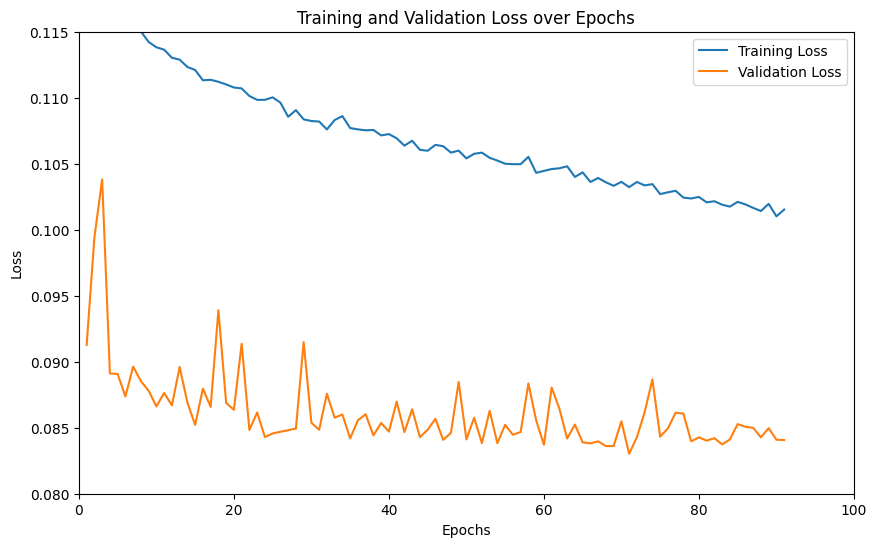

Tiempo total de entrenamiento: 157.7956666946411 segundos


In [7]:
import matplotlib.pyplot as plt

# Extraer la información de la función objetivo desde el historial de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear un gráfico con los valores de la función objetivo respecto a las épocas
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')

# Ajustar los límites de los ejes
plt.ylim(0.080, 0.115)
plt.xlim(0, 100)

# Agregar etiquetas y leyenda al gráfico
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Mostrar el gráfico
plt.show()

# Imprimir el tiempo total de entrenamiento
print(f"Tiempo total de entrenamiento: {end_time - start_time} segundos")



In [8]:
# Realizar predicciones en el conjunto de prueba
y_pred = new_model.predict(X_test_norm)
print(y_pred)

# Crear un DataFrame con las predicciones desnormalizadas y los valores reales
resultados = pd.DataFrame({'Valor Real': y_test_norm.values.flatten(), 'Predicciones': y_pred.flatten()})
print(resultados)

# Agregar la columna de predicciones al conjunto de prueba
test_data['Predicted_Column13'] = y_pred.flatten()

# Crear un DataFrame para almacenar los resultados desnormalizados
desnormalized_test_data = test_data.copy()

# Desnormalizar 'Column1' a 'Column13' y 'Predicted_Column13' según la normalización por grupos
for group, scalerY in scalers.items():
    # Filtrar el conjunto de prueba correspondiente al grupo
    group_test_data = test_data[test_data['Column15'] == group]

    # Seleccionar las columnas normalizadas para desnormalizar
    normalized_features = group_test_data[['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column13', 'Predicted_Column13']]

    # Desnormalizar los datos utilizando el objeto scalerY correspondiente
    original_data = scalerY.inverse_transform(normalized_features)

    # Crear un DataFrame temporal para almacenar los datos desnormalizados
    temp_df = pd.DataFrame(original_data, columns=['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column13', 'Predicted_Column13'])

    # Actualizar el DataFrame desnormalizado con los datos desnormalizados
    desnormalized_test_data.loc[desnormalized_test_data['Column15'] == group, ['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column13', 'Predicted_Column13']] = temp_df.values

# Imprimir el conjunto de prueba después de la desnormalización
print(desnormalized_test_data)

# Eliminar todas las columnas excepto las últimas cuatro
resultados = desnormalized_test_data.iloc[:, -4:]

# Imprimir el conjunto de prueba después de la eliminación de columnas
print(resultados)

1600/1600 [==============================] - 2s 976us/step
[[0.16092771]
 [0.07693723]
 [0.09597149]
 ...
 [0.02035059]
 [0.30311322]
 [0.01817047]]
       Valor Real  Predicciones
0        0.285714      0.160928
1        0.090909      0.076937
2        0.144578      0.095971
3        0.093750      0.067425
4        0.037037      0.068133
...           ...           ...
51171    0.062500      0.055938
51172    0.047619      0.093200
51173    0.024390      0.020351
51174    0.301370      0.303113
51175    0.011905      0.018170

[51176 rows x 2 columns]


C:\Users\AdrianGilGamboa\AppData\Local\Temp\ipykernel_3836\2159188855.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[18.38783032 18.65787895 18.63696527 23.16191009 22.87440531 19.93902594
 20.70578961 18.38873691 17.81422976 17.85362443 16.76273105 17.89076892
 16.96496859 18.52735023 18.00160582 20.90096144]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  desnormalized_test_data.loc[desnormalized_test_data['Column15'] == group, ['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column13', 'Predicted_Column13']] = temp_df.values


        Column1  Column2  Column3  Column4  Column5  Column6  Column7  \
103825      3.0      3.0      4.0      4.0      3.0      4.0      4.0   
29845      27.0     26.0     31.0     28.0     30.0     26.0     28.0   
80875      12.0      8.0      9.0     15.0     15.0     11.0     45.0   
54631      19.0     25.0     25.0     34.0     28.0     30.0     26.0   
22771      70.0     76.0     75.0     82.0     74.0     80.0    195.0   
...         ...      ...      ...      ...      ...      ...      ...   
143585     10.0      8.0      9.0     13.0      9.0     10.0     11.0   
106325     10.0      7.0      6.0      7.0     10.0      7.0      6.0   
26027      17.0     28.0     46.0     16.0     16.0     18.0     49.0   
151091     22.0     22.0     24.0     29.0     26.0     24.0     25.0   
170585     11.0     11.0     11.0      9.0     13.0     10.0      9.0   

        Column8  Column9  Column10  Column11  Column12  Column13 Column14  \
103825      5.0     11.0       6.0       8.0  

In [9]:
# Obtener y_test_norm de la primera columna de resultados
y_test_norm = resultados['Column13']

# Obtener y_pred de la última columna del conjunto de prueba después de la desnormalización
y_pred = desnormalized_test_data['Predicted_Column13']

# Imprimir y_test_norm y y_pred
print("y_test_norm:", y_test_norm)
print("y_pred:", y_pred)


# Imprimir el DataFrame
print(resultados)
# Guardar el DataFrame resultados en un archivo CSV
resultados.to_csv('resultadosWaterTransfer18Freeze(NoStratified).csv', index=False)

# Calcular RMSE con datos desnormalizados
rmse = np.sqrt(mean_squared_error(y_test_norm, y_pred))
print(f'RMSE en el conjunto de prueba: {rmse}')

# Calcular MAE con datos desnormalizados
mae = mean_absolute_error(y_test_norm, y_pred)
print(f'MAE en el conjunto de prueba: {mae}')

# Calcular MRE con datos desnormalizados
mre = custom_mre(y_test_norm, y_pred)
print(f'MAPE en el conjunto de prueba: {mre}')

#Calcular MAPE con datos desnormalizados
#print("Mean absolute percentage error (MAPE): %f" % mean_absolute_percentage_error(y_test_norm, y_pred))

# Calcula la duración del entrenamiento en segundos
training_duration = end_time - start_time
# Imprime el tiempo de entrenamiento en segundos y en formato de horas, minutos y segundos
print(f'Tiempo de entrenamiento: {training_duration:.2f} segundos')
#print(f'Tiempo de entrenamiento (HH:MM:SS): {int(training_duration // 3600)}:{int((training_duration % 3600) // 60)}:{int(training_duration % 60)}')

y_test_norm: 103825     9.0
29845     28.0
80875     20.0
54631     34.0
22771     65.0
          ... 
143585    12.0
106325     7.0
26027      5.0
151091    37.0
170585     8.0
Name: Column13, Length: 51176, dtype: float64
y_pred: 103825     6.379482
29845     26.770476
80875     15.965633
54631     29.787959
22771     69.198008
            ...    
143585    11.580005
106325     7.957190
26027      4.337497
151091    37.127265
170585     9.052639
Name: Predicted_Column13, Length: 51176, dtype: float64
        Column13 Column14  Column15  Predicted_Column13
103825       9.0   2011/4     36197            6.379482
29845       28.0   2011/4     10536           26.770476
80875       20.0   2011/4     27386           15.965633
54631       34.0   2011/4     18769           29.787959
22771       65.0   2011/4      7890           69.198008
...          ...      ...       ...                 ...
143585      12.0   2015/4     51327           11.580005
106325       7.0   2015/4     36777         